In [23]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('ventas-por-factura.csv')

In [24]:
# Ver las primeras filas para entender la estructura
print("Primeras filas del conjunto de datos:")
print(df.head())

Primeras filas del conjunto de datos:
  N° de factura     Fecha de factura  ID Cliente            País  Cantidad  \
0        548370   3/30/2021 16:14:00     15528.0  United Kingdom       123   
1        575767  11/11/2021 11:11:00     17348.0  United Kingdom       163   
2       C570727  10/12/2021 11:32:00     12471.0         Germany        -1   
3        549106    4/6/2021 12:08:00     17045.0  United Kingdom         1   
4        573112  10/27/2021 15:33:00     16416.0  United Kingdom       357   

    Monto  
0  229,33  
1  209,73  
2   -1,45  
3   39,95  
4  344,83  


In [25]:
# Resumen de datos faltantes y tipos de datos
print("\nResumen de datos:")
print(df.info())


Resumen de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


In [28]:
# Limpieza de datos

# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())


Valores nulos en cada columna:
N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64


2. Análisis Exploratorio de Datos (EDA)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos
plt.style.use('ggplot')
sns.set_palette('pastel')

In [30]:
# Cargar los datos (asegúrate de que los datos están limpios y con tipos de datos correctos como en el paso anterior)
df = pd.read_csv('ventas-por-factura.csv')
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'], errors='coerce')

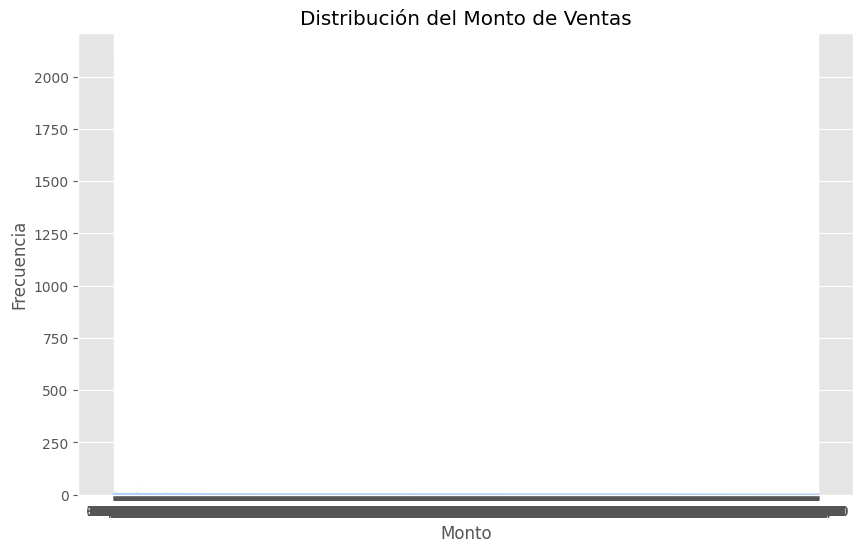

In [31]:
# Análisis de la distribución de la variable "Monto" (Total de ventas)
plt.figure(figsize=(10, 6))
sns.histplot(df['Monto'], bins=30, kde=True)
plt.title('Distribución del Monto de Ventas')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

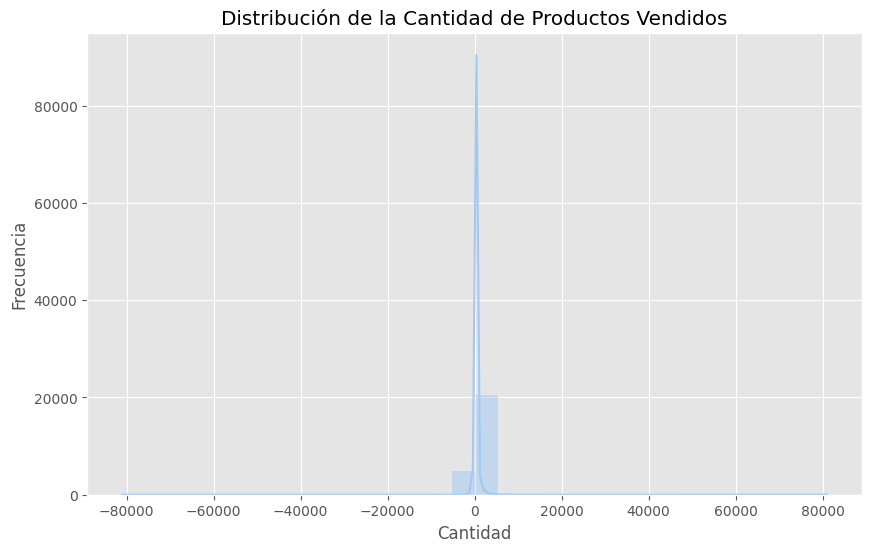

In [32]:
# Distribución de la cantidad de productos vendidos
plt.figure(figsize=(10, 6))
sns.histplot(df['Cantidad'], bins=30, kde=True)
plt.title('Distribución de la Cantidad de Productos Vendidos')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

In [33]:
# Asegurarse de que la columna "Monto" sea de tipo numérico
df['Monto'] = pd.to_numeric(df['Monto'], errors='coerce')

# Revisar los nombres de las columnas
print("Nombres de columnas:", df.columns)


Nombres de columnas: Index(['N° de factura', 'Fecha de factura', 'ID Cliente', 'País', 'Cantidad',
       'Monto'],
      dtype='object')


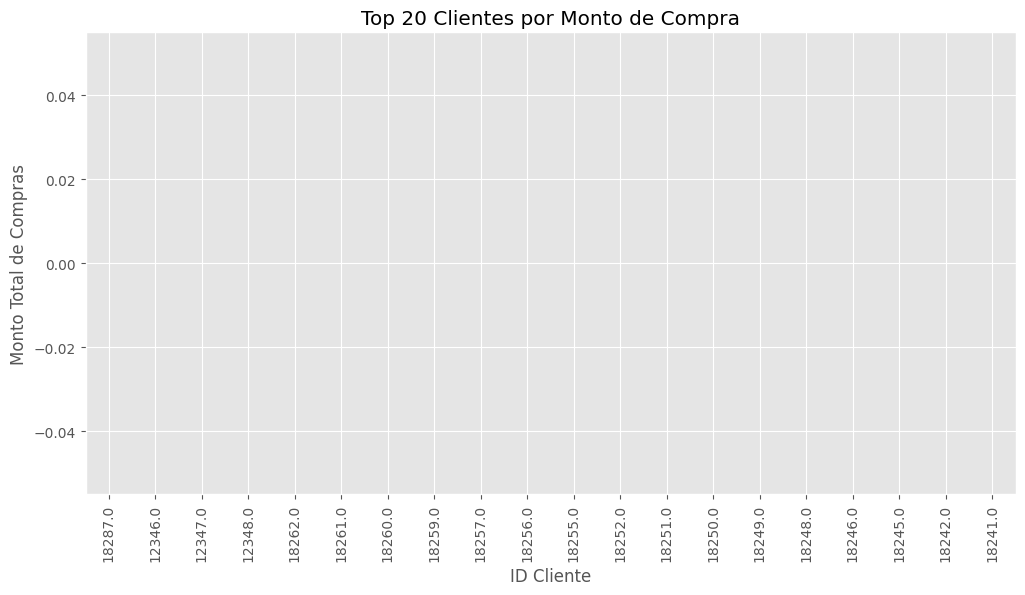

In [35]:
# Análisis de ventas por cliente
try:
    # Agrupación y selección de las primeras 20 filas para graficar
    ventas_cliente = df.groupby('ID Cliente')['Monto'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    ventas_cliente.iloc[:20].plot(kind='bar')  # Cambiado a iloc para selección posicional
    plt.title('Top 20 Clientes por Monto de Compra')
    plt.xlabel('ID Cliente')
    plt.ylabel('Monto Total de Compras')
    plt.show()
except KeyError as e:
    print(f"Error: {e}. Verifica el nombre de la columna y que esté correctamente escrito.")
except TypeError as e:
    print(f"Error: {e}. Verifica que la columna 'Monto' contiene datos numéricos.")

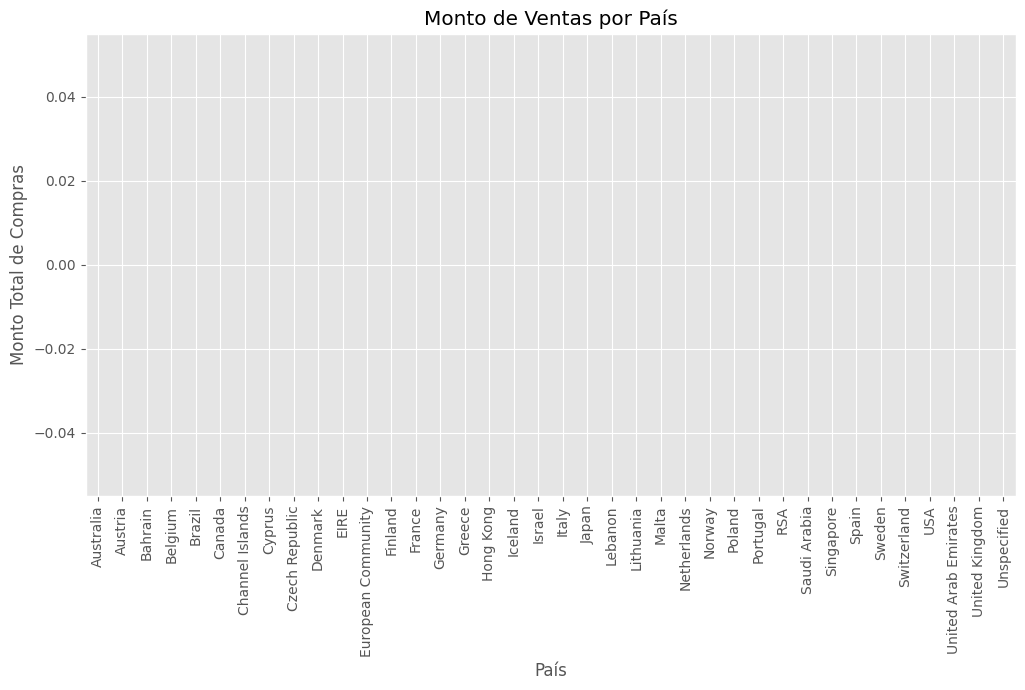

In [36]:
# Ventas por país
ventas_pais = df.groupby('País')['Monto'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ventas_pais.plot(kind='bar')
plt.title('Monto de Ventas por País')
plt.xlabel('País')
plt.ylabel('Monto Total de Compras')
plt.show()

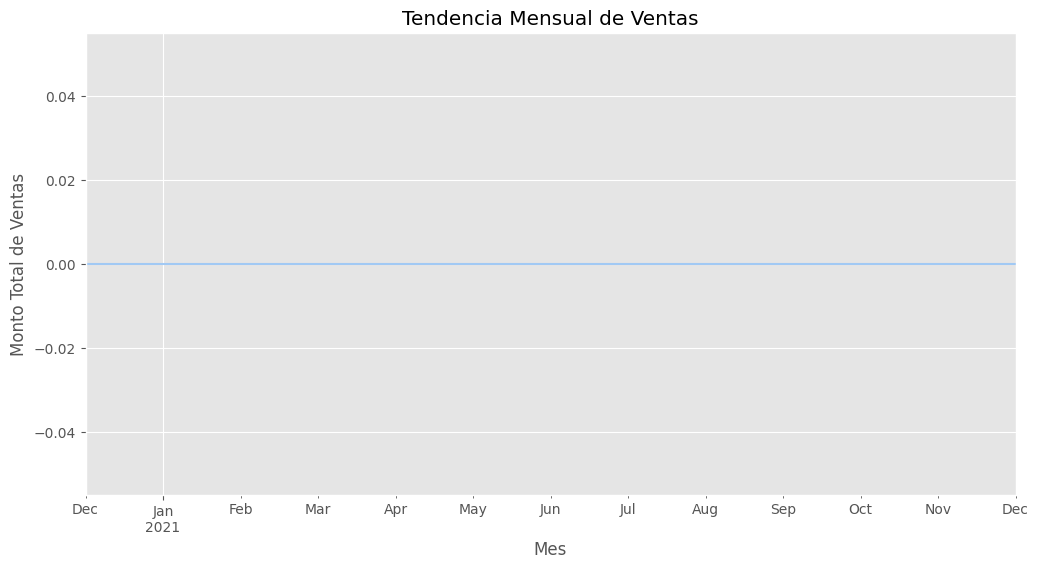

In [37]:
# Análisis temporal - ventas por mes
df['Mes'] = df['Fecha de factura'].dt.to_period('M')
ventas_mensuales = df.groupby('Mes')['Monto'].sum()

plt.figure(figsize=(12, 6))
ventas_mensuales.plot()
plt.title('Tendencia Mensual de Ventas')
plt.xlabel('Mes')
plt.ylabel('Monto Total de Ventas')
plt.show()

In [40]:
# Estadísticas descriptivas para monto y cantidad
print("\nEstadísticas descriptivas para 'Monto' y 'Cantidad':")
print(df[['Monto', 'Cantidad']].describe())


Estadísticas descriptivas para 'Monto' y 'Cantidad':
       Monto      Cantidad
count    0.0  25953.000000
mean     NaN    199.474049
std      NaN   1107.075809
min      NaN -80995.000000
25%      NaN      6.000000
50%      NaN    100.000000
75%      NaN    240.000000
max      NaN  80995.000000


3. Preprocesamiento de Datos

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar los datos
df = pd.read_csv('ventas-por-factura.csv')
df.columns = df.columns.str.strip()  # Eliminar espacios adicionales en nombres de columna
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'], errors='coerce')


In [44]:

# Convertir 'Monto' a formato numérico reemplazando las comas por puntos
df['Monto'] = df['Monto'].astype(str).str.replace(',', '.').astype(float)
df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')  # Asegurar que 'Cantidad' también sea numérico



In [45]:
# 1. Normalización de variables numéricas
scaler = MinMaxScaler()
df[['Monto', 'Cantidad']] = scaler.fit_transform(df[['Monto', 'Cantidad']])

In [46]:
# 2. Transformación de variables temporales
df['Año'] = df['Fecha de factura'].dt.year
df['Mes'] = df['Fecha de factura'].dt.month
df['Día de la semana'] = df['Fecha de factura'].dt.dayofweek

In [47]:
# 3. Codificación de variables categóricas
df = pd.get_dummies(df, columns=['País'], drop_first=True)

In [48]:
# Visualización del DataFrame procesado
print("DataFrame después del preprocesamiento:")
print(df.head())

DataFrame después del preprocesamiento:
  N° de factura    Fecha de factura  ID Cliente  Cantidad     Monto   Año  \
0        548370 2021-03-30 16:14:00     15528.0  0.500759  0.500681  2021   
1        575767 2021-11-11 11:11:00     17348.0  0.501006  0.500622  2021   
2       C570727 2021-10-12 11:32:00     12471.0  0.499994  0.499996  2021   
3        549106 2021-04-06 12:08:00     17045.0  0.500006  0.500119  2021   
4        573112 2021-10-27 15:33:00     16416.0  0.502204  0.501023  2021   

   Mes  Día de la semana  País_Austria  País_Bahrain  ...  País_RSA  \
0    3                 1         False         False  ...     False   
1   11                 3         False         False  ...     False   
2   10                 1         False         False  ...     False   
3    4                 1         False         False  ...     False   
4   10                 2         False         False  ...     False   

   País_Saudi Arabia  País_Singapore  País_Spain  País_Sweden  \
0    

In [52]:
# Guardar el DataFrame preprocesado para usar en el modelado
df.to_csv('ventas_preprocesadas.csv', index=False)

4. Modelado

In [53]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Cargar el DataFrame preprocesado
df = pd.read_csv('ventas_preprocesadas.csv')

In [54]:
# Crear una matriz cliente-producto
# Ejemplo de cómo podrían construirse las columnas 'ID Cliente' y 'N° de factura' para este tipo de matriz
matriz_cliente_producto = df.pivot_table(index='ID Cliente', columns='N° de factura', values='Monto', fill_value=0)

In [55]:
# Paso 2: Calcular la similitud entre clientes
# Utilizamos similitud del coseno
similaridad_clientes = cosine_similarity(matriz_cliente_producto)
similaridad_clientes_df = pd.DataFrame(similaridad_clientes, index=matriz_cliente_producto.index, columns=matriz_cliente_producto.index)

In [56]:
# Función para obtener recomendaciones
def recomendar_productos(cliente_id, n_recomendaciones=5):
    # Encontrar los clientes más similares al cliente dado
    similares = similaridad_clientes_df[cliente_id].sort_values(ascending=False).drop(cliente_id).index
    # Productos comprados por los clientes similares
    productos_similares = matriz_cliente_producto.loc[similares].sum(axis=0)
    # Excluir productos ya comprados por el cliente dado
    productos_no_comprados = productos_similares[matriz_cliente_producto.loc[cliente_id] == 0]
    # Recomendar los productos con mayor puntuación
    recomendaciones = productos_no_comprados.sort_values(ascending=False).head(n_recomendaciones)
    return recomendaciones.index.tolist()

In [57]:
# Ejemplo de recomendaciones
cliente_id_ejemplo = matriz_cliente_producto.index[0]  # Tomar un cliente de ejemplo
recomendaciones = recomendar_productos(cliente_id_ejemplo, n_recomendaciones=5)
print(f"Recomendaciones para el cliente {cliente_id_ejemplo}: {recomendaciones}")

Recomendaciones para el cliente 12346.0: ['581483', '556444', '567423', '556917', '572209']
